In [1]:
import torch

In [2]:
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer
model = Unet(
    dim = 64, #Just affects how many nodes are in our blocks
    dim_mults = (1, 2, 4)
).cuda()
# Our save was done using "save(save_dict)" but then there was a dictionary as part of it too

#So what we saved had step, model....
#That means the pt file has a bunch of terms and one of the terms is the model ([model])

#But the required code is given to us in our trainer function.
#To access that, lets call diffusion and stuff first

diffusion = GaussianDiffusion(
    model,
    image_size = 32,           #Try the other set instead
    timesteps = 1000,           # number of steps 
    sampling_timesteps = 1000,   # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
    loss_type = 'l1'            # L1 or L2
).cuda()

trainer = Trainer(
    diffusion,
    '/scratch/vb2184/cifar10/test',  #Start by evaluating on the training data
    train_batch_size = 16,
    train_lr = 8e-5,
    train_num_steps = 100000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = False                        # turn on mixed precision
)

/home/vb2184/.local/lib/python3.8/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 40 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [3]:
trainer.load('99')

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


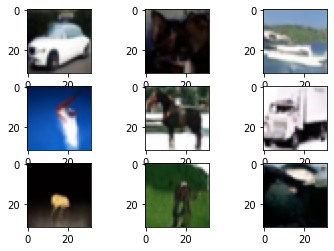

In [24]:
import matplotlib.pyplot as plt
#sampled_images = diffusion.sample(batch_size = 9)


# I think this may be wrong. maybe save
# Try this?
# utils.save_image(all_images, str(self.results_folder / f'sample-{milestone}.png'), nrow = int(math.sqrt(self.num_samples)))
f = plt.figure()
for i in range(9):
  f.add_subplot(3, 3, i + 1)
  temp=sampled_images[i]
  temp=temp.detach().cpu()
  print(temp.shape)
  temp = temp.swapaxes(0,1)
  temp = temp.swapaxes(1,2)
  plt.imshow(temp)


plt.show(block=True)

sampling loop time step: 0it [00:00, ?it/s]

torch.Size([3, 32, 32])


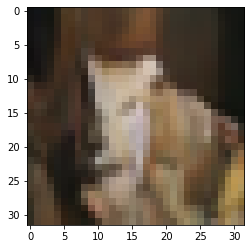

In [14]:
sampled_images = diffusion.sample(batch_size = 1)
temp=sampled_images[0]
temp=temp.detach().cpu()
print(temp.shape)
temp = temp.swapaxes(0,1)
temp = temp.swapaxes(1,2)
plt.imshow(temp)

plt.show(block=True)

In [7]:
sampled_images

tensor([[[[0.1224, 0.1161, 0.1096,  ..., 0.0939, 0.0905, 0.0792],
          [0.1352, 0.1170, 0.1118,  ..., 0.0820, 0.0782, 0.0718],
          [0.1328, 0.1158, 0.1054,  ..., 0.0794, 0.0771, 0.0750],
          ...,
          [0.3714, 0.2884, 0.1057,  ..., 0.5603, 0.5266, 0.5915],
          [0.2583, 0.4161, 0.1272,  ..., 0.5351, 0.4804, 0.6203],
          [0.2819, 0.4496, 0.2773,  ..., 0.5874, 0.5647, 0.6461]],

         [[0.2089, 0.1982, 0.1914,  ..., 0.1588, 0.1530, 0.1468],
          [0.2240, 0.1963, 0.1875,  ..., 0.1483, 0.1433, 0.1436],
          [0.2170, 0.1853, 0.1640,  ..., 0.1420, 0.1419, 0.1470],
          ...,
          [0.3633, 0.2496, 0.1248,  ..., 0.4685, 0.4504, 0.5060],
          [0.2575, 0.3505, 0.1359,  ..., 0.4583, 0.4177, 0.5523],
          [0.2661, 0.3661, 0.2544,  ..., 0.5039, 0.4992, 0.5807]],

         [[0.0855, 0.0834, 0.0823,  ..., 0.0870, 0.0818, 0.0717],
          [0.0937, 0.0789, 0.0786,  ..., 0.0720, 0.0677, 0.0633],
          [0.0833, 0.0675, 0.0584,  ..., 0

In [22]:
from torchvision import transforms as T, utils
sampled_images = diffusion.sample(batch_size = 9)
utils.save_image(sampled_images, "teja.png", nrow = 3)

sampling loop time step: 0it [00:00, ?it/s]